# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Mulukutla Krishna Praneet<br>
Roll Number: 2020113010

### Dataset

Use the code below to load the Dataset


In [269]:
import numpy as np
import matplotlib.pyplot as plt

In [270]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

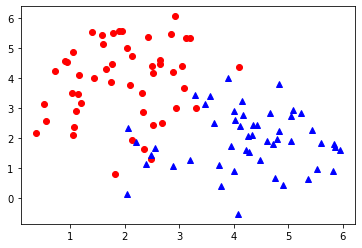

In [271]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

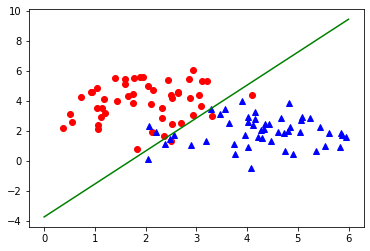

Accuracy =  0.85


In [272]:
from sklearn.model_selection import train_test_split

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# use the sigmoid function to calculate the probability of the logistic regression model
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

# Logistic Regression

class LogisticRegression():
    def __init__(self, X_train, y_train, learning_rate, iterations):
        # self.X = X_train
        self.X = np.c_[np.ones((X_train.shape[0],1)),X_train]
        self.y = y_train
        self.W = np.zeros((X_train.shape[1]+1,1))
        # self.learning_rate = 0.001
        self.learning_rate = learning_rate
        # self.iterations = 100000
        self.iterations = iterations
        # print(self.X.shape)
        # print(self.y.shape)
        # print(self.W.shape)

# use the log loss function to calculate the loss in the logistic regression model
    def log_loss(self, W):
        z = np.dot(self.X,W)
        cost0 = (self.y).T.dot(np.log(sigmoid(z)))
        cost1 = (1-(self.y)).T.dot(np.log(1-sigmoid(z)))
        cost = -((cost1 + cost0))/len(self.y) 
        return cost

    # dJ/dW = X.T.dot(sigmoid(z)-y)       

    def fit(self):
        # dJ_by_dW = 500
        # counter = 0
        counter = 0
        diff = 500
        prev_W = self.W
        # for i in range(self.iterations):        
        while (diff > 1e-5):
            z = np.dot(self.X,self.W)
            dJ_by_dW = np.dot(self.X.T,(sigmoid(z)-np.reshape(self.y,(len(self.y),1))))
            self.W = self.W - ((self.learning_rate) / (self.X.shape[0]) ) * dJ_by_dW
            diff = np.sum(abs(self.W - prev_W))
            prev_W = self.W
            counter += 1
            # print(self.W)
            # if i % 1000 == 0:
                # print(self.log_loss(self.W))
        # print("Number of iterations: ", counter)
        return self.W

    def predict(self, X_test):
        X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]
        z = np.dot(X_test,self.W)   
        return sigmoid(z)
    
    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)
        # print(y_pred)
        # print(y_test)
        # compare the predicted value with the actual value
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count += 1
        return count/len(y_pred)
        # return np.mean(y_pred == y_test)
    
    def plot(self):
        plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
        plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
        x1 = np.linspace(0, 6, 80)
        x2 = -(self.W[0] + self.W[1]*x1)/self.W[2]
        plt.plot(x1, x2, color='green')
        # plt.plot(self.W)
        # print(self.W)
        plt.show()
    

model = LogisticRegression(X_train, y_train, 0.01, 100000)
model.fit()
model.plot()
print("Accuracy = " , model.accuracy(X_test, y_test))


### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.